# Data Understanding

In [59]:
# Importing libraries pandas and numpy
import pandas as pd
import numpy as np

In [60]:
# Importing seaborn and matplotlib 
import seaborn as sns

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [61]:
# Setting the size of the plots/Figures
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [62]:
# Loading the dataset and priviewing the first 5 records

Movies = pd.read_csv("movies.csv")
Movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [63]:
#Checking the number of records and rows
Movies.shape

# 15 column and 7668 records

(7668, 15)

In [64]:
# Selecting the column names
Movies.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [65]:
# Checking column information

Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


# Data Cleaning

### Completeness

In [66]:
#Cheacking for missing values
Movies.isnull().sum()

# OR
# for col in Movies.columns:
#     missing = np.mean(Movies[col].isna())
#     print(f'{col} - {missing}')
#Filling Null values in Rating column
Movies.rating.fillna('Not Rated', inplace=True)

# Fiiling Missing Values in Released column. 
#On doing research the two missimg releas dates are from 2010 
#Fill thr first
Movies.released.fillna(value='October 29, 2010 (United States)', limit=1, inplace = True)
#Second value
Movies.released.fillna(value='February 12, 2010 (United States)', limit=1, inplace = True)

# Fiiling Missing Values in Released column. 
Movies.score.fillna(Movies.score.median, inplace=True)

# Fiiling Missing Values in Votes column.
Movies.votes.fillna(Movies.votes.mean(), inplace=True)

# Fiiling Missing Values in Writer column.
Movies.writer.fillna(value='Jane Garmey', limit=1, inplace = True)
#Second value
Movies.writer.fillna(value="Beth O' Leary", limit=1, inplace = True)

#Filling miisinf values in star column
Movies.star.fillna('Ethel Merman', inplace=True)

#Filling miisinf values in country column
#All movies with missing country are from USA
Movies.country.fillna('United States', inplace=True)

#Interpolate missing values for Budget, gross 
Movies.gross.interpolate(method='linear', axis=0, inplace=True)

Movies.budget.interpolate(method='linear', axis=0, inplace=True)


Movies.budget.interpolate(method='linear', axis=0, inplace=True)

#Filling miisinf values in company and runtime column

Movies.company.fillna(method='ffill', inplace= True)

Movies.runtime.fillna(method='bfill', inplace= True)


### Consistency

In [67]:
#Checking for duplicates
Movies.duplicated().sum()

#There are no duplicated records

0

### Data Validation


In [68]:
#Checking Datatype sfor each column
Movies.dtypes

#Changing datatype for budget and gross columns to int

Movies['budget'] = Movies['budget'].astype('int64')

Movies['gross'] = Movies['gross'].astype('int64')

In [69]:
#Updating the year Column with years that match the ones in the released column
#Creating correct year column
Movies['year_of_release'] = Movies['released'].astype(str).map(lambda x: x[x.find(','): x.find('(')])
Movies['year_of_release']= Movies['year_of_release'].str[2:6]
Movies['year_of_release'].unique()

array(['1980', '1981', '1984', '', '1983', '1982', '1987', '1985', '1986',
       '1988', '1990', '1989', '1992', '2008', '1991', '1993', '1999',
       '2001', '2016', '1997', '1994', '1995', '1998', '2019', '1996',
       '2000', '2014', '2002', '2003', '2005', '2004', '2006', '2007',
       '2010', '2011', '2009', '2013', '2015', '2012', '2017', '2018',
       '2020'], dtype=object)

# Exploratory Data analysis

###Correlation 

In [70]:
#Correlation Matric 
correlation_matrix = Movies.corr()
correlation_matrix

,year,votes,budget,gross,runtime
year,1.000000,0.222810,0.351959,0.259202,0.120806
votes,0.222810,1.000000,0.448915,0.631216,0.309122
budget,0.351959,0.448915,1.000000,0.705322,0.271451
gross,0.259202,0.631216,0.705322,1.000000,0.243611
runtime,0.120806,0.309122,0.271451,0.243611,1.000000


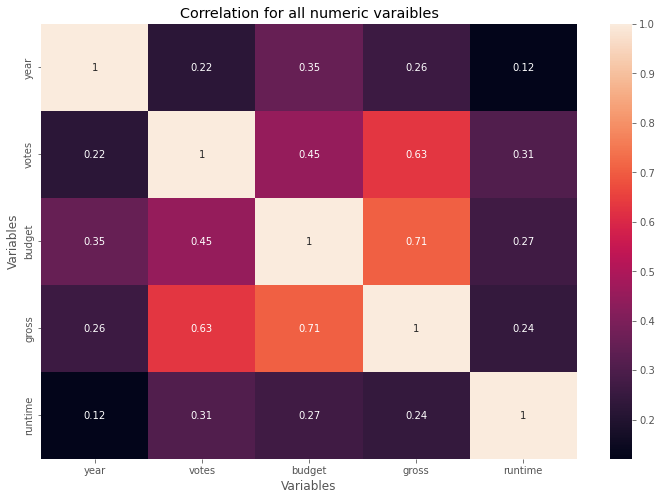

In [74]:
# Heatmap for the core;ation matris
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation for all numeric varaibles")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

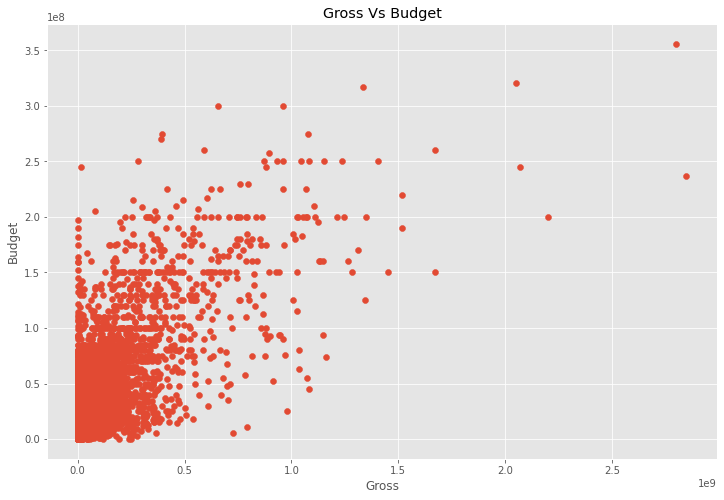

In [75]:
#Scatter plot for bugdet vs gross

plt.scatter(x=Movies['gross'], y=Movies['budget'])
plt.title("Gross Vs Budget")
plt.xlabel("Gross")
plt.ylabel("Budget")
plt.show()

<AxesSubplot:xlabel='gross', ylabel='budget'>

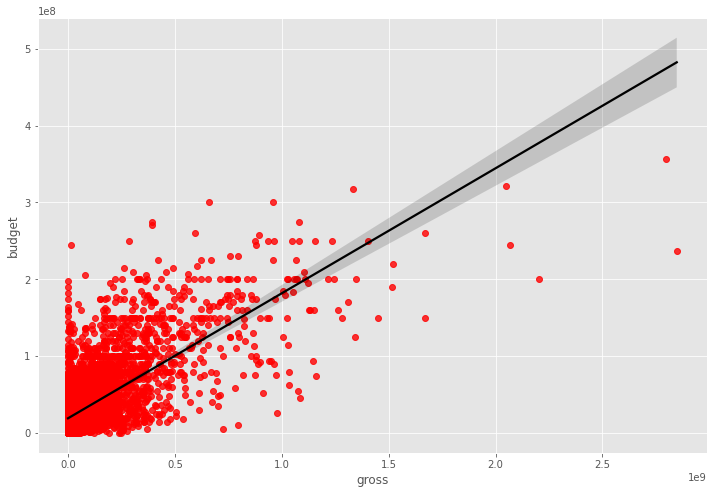

In [76]:
# plot for bugdet vs gross using sns

sns.regplot(x=Movies['gross'], y=Movies['budget'], scatter_kws={'color': 'r'}, line_kws={'color': 'black'})

#There is a high correlation  between budget and gross

In [77]:
#Converting columns to have numeric values
Movies_Numeric = Movies
for col in Movies_Numeric.columns:
    if (Movies_Numeric[col].dtype == 'object'):
        Movies_Numeric[col] = Movies_Numeric[col].astype('category')
        Movies_Numeric[col] = Movies_Numeric[col].cat.codes
Movies_Numeric

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_of_release
0,6587,6,6,1980,1705,0,9.270000e+05,2589,4016,1048,54,19000000,46998772,2319,146.0,1
1,5573,6,1,1980,1492,1,6.500000e+04,2269,1633,327,55,4500000,58853106,731,104.0,1
2,5142,4,0,1980,1771,2,1.200000e+06,1111,2569,1746,55,18000000,538375067,1540,124.0,1
3,286,4,4,1980,1492,3,2.210000e+05,1301,2002,2247,55,3500000,83453539,1812,88.0,1
4,1027,6,4,1980,1543,4,1.080000e+05,1054,522,410,55,6000000,39846344,1777,98.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,3,6,2020,2964,59,1.800000e+01,1500,2291,2422,55,7000,13266,884,90.0,41
7664,1678,3,4,2020,1107,32,3.600000e+01,774,2616,1887,55,32875,13266,539,90.0,41
7665,4717,3,6,2020,193,46,2.900000e+01,2061,2685,2041,55,58750,13266,941,120.0,41
7666,2843,3,6,2020,2817,72,8.810850e+04,1184,1825,450,55,15000,13266,941,120.0,41


In [79]:
#Correlation Matrix for all variables including the numerized ones
correlation_matrix1 = Movies_Numeric.corr()
correlation_matrix1


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_of_release
name,1.000000,-0.010860,0.016355,0.011453,-0.010967,-0.008892,0.013086,0.009079,0.009319,0.006585,-0.010425,0.019360,0.006708,0.009980,0.010424,0.010221
rating,-0.010860,1.000000,0.104108,0.019913,0.021534,-0.040422,0.022813,0.018466,-0.005127,0.009040,0.053305,-0.125897,-0.121471,-0.063630,0.067061,0.017628
genre,0.016355,0.104108,1.000000,-0.081261,0.030133,-0.008264,-0.145276,-0.015258,0.006722,-0.005227,-0.035896,-0.311171,-0.230974,-0.070347,-0.052406,-0.081616
year,0.011453,0.019913,-0.081261,1.000000,-0.000249,-0.041029,0.222810,-0.020795,-0.008789,-0.027440,-0.069423,0.351959,0.259202,-0.009918,0.120806,0.993136
released,-0.010967,0.021534,0.030133,-0.000249,1.000000,-0.019517,0.016102,-0.001467,-0.002673,0.016112,-0.021926,0.012237,0.000886,-0.010102,0.000873,-0.002448
score,-0.008892,-0.040422,-0.008264,-0.041029,-0.019517,1.000000,0.062200,-0.000307,0.003627,0.002987,0.001836,-0.016049,-0.007548,-0.000987,-0.054262,-0.040709
votes,0.013086,0.022813,-0.145276,0.222810,0.016102,0.062200,1.000000,0.000260,0.000778,-0.019354,0.073582,0.448915,0.631216,0.132441,0.309122,0.219955
director,0.009079,0.018466,-0.015258,-0.020795,-0.001467,-0.000307,0.000260,1.000000,0.298994,0.039435,0.017926,-0.004015,-0.014332,0.004536,0.017684,-0.018666
writer,0.009319,-0.005127,0.006722,-0.008789,-0.002673,0.003627,0.000778,0.298994,1.000000,0.027775,0.015396,-0.021190,-0.023085,0.004313,-0.003758,-0.006750
star,0.006585,0.009040,-0.005227,-0.027440,0.016112,0.002987,-0.019354,0.039435,0.027775,1.000000,-0.014210,-0.019665,-0.001075,0.010588,0.009979,-0.025472


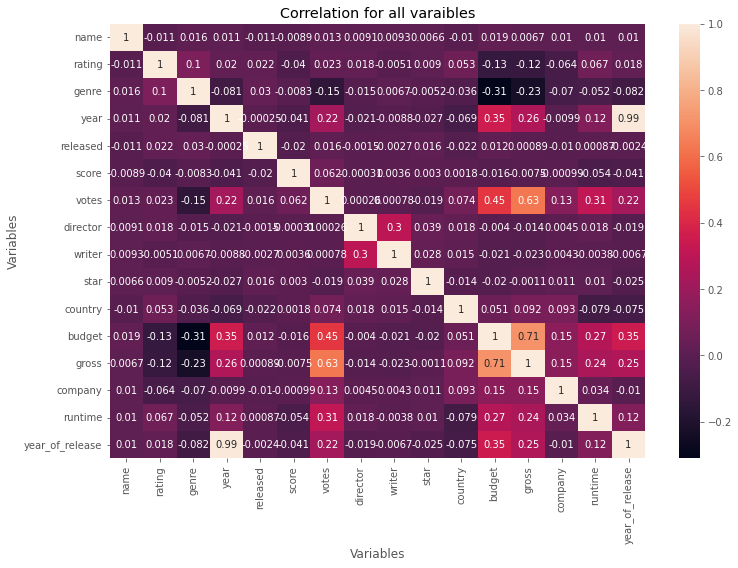

In [80]:
sns.heatmap(correlation_matrix1, annot=True)
plt.title("Correlation for all varaibles")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

In [90]:
Sortted_unstacked = correlation_matrix1.unstack().sort_values()
Sortted_unstacked
#pd.set_option('display.max_row', None)

budget           genre             -0.311171
genre            budget            -0.311171
gross            genre             -0.230974
genre            gross             -0.230974
votes            genre             -0.145276
genre            votes             -0.145276
budget           rating            -0.125897
rating           budget            -0.125897
gross            rating            -0.121471
rating           gross             -0.121471
year_of_release  genre             -0.081616
genre            year_of_release   -0.081616
                 year              -0.081261
year             genre             -0.081261
runtime          country           -0.079256
country          runtime           -0.079256
year_of_release  country           -0.075111
country          year_of_release   -0.075111
genre            company           -0.070347
company          genre             -0.070347
year             country           -0.069423
country          year              -0.069423
company   

In [92]:
high_corr = Sortted_unstacked[(Sortted_unstacked) > 0.5]
high_corr

#Votes and budget have a high corelation to gross

gross            votes              0.631216
votes            gross              0.631216
gross            budget             0.705322
budget           gross              0.705322
year             year_of_release    0.993136
year_of_release  year               0.993136
name             name               1.000000
company          company            1.000000
gross            gross              1.000000
budget           budget             1.000000
country          country            1.000000
star             star               1.000000
writer           writer             1.000000
director         director           1.000000
votes            votes              1.000000
score            score              1.000000
released         released           1.000000
year             year               1.000000
genre            genre              1.000000
rating           rating             1.000000
runtime          runtime            1.000000
year_of_release  year_of_release    1.000000
dtype: flo